Created by: Manideep Elasagaram

Competetion: Regression with an Abalone Dataset

# IMPORTING REQUIRED PACKAGES

In [1]:
# !pip install catboost

In [2]:
from pathlib import Path

import pandas as pd
import numpy as np

import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from dmba import regressionSummary, exhaustive_search
from dmba import classificationSummary, gainsChart, liftChart
from dmba import plotDecisionTree, classificationSummary, regressionSummary

from mord import LogisticIT
from math import sqrt


import statsmodels.api as sm
import statsmodels.formula.api as sm
import xgboost as xgb

import matplotlib.pylab as plt
import matplotlib.pyplot as plt
%matplotlib inline

no display found. Using non-interactive Agg backend


# CREATING DATAFRAME

In [3]:
#creating Abalone_df dataframe 
Abalone_df = pd.read_csv("train.csv")

In [4]:
#Dropping 'id' as it's and independent feature
Abalone_df =Abalone_df.drop(columns="id")
Abalone_df

,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9
...,...,...,...,...,...,...,...,...,...
90610,M,0.335,0.235,0.075,0.1585,0.0685,0.0370,0.0450,6
90611,M,0.555,0.425,0.150,0.8790,0.3865,0.1815,0.2400,9
90612,I,0.435,0.330,0.095,0.3215,0.1510,0.0785,0.0815,6
90613,I,0.345,0.270,0.075,0.2000,0.0980,0.0490,0.0700,6


In [5]:
#Dimensions 
Abalone_df.shape

(90615, 9)

In [6]:
#Display the first 20 column of the dataframe
Abalone_df.head(20)

,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9
5,F,0.610,0.480,0.170,1.2010,0.5335,0.3135,0.3085,10
6,M,0.415,0.325,0.110,0.3315,0.1655,0.0715,0.1300,9
7,F,0.610,0.490,0.150,1.1165,0.4955,0.2945,0.2950,9
8,I,0.205,0.150,0.040,0.0460,0.0145,0.0105,0.0100,4
9,I,0.565,0.425,0.125,0.6510,0.3795,0.1420,0.1800,8


In [7]:
#Total column names
Abalone_df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1',
       'Whole weight.2', 'Shell weight', 'Rings'],
      dtype='object')

In [8]:
Abalone_df['Sex'] = Abalone_df['Sex'].astype('category')
Abalone_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90615 entries, 0 to 90614
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Sex             90615 non-null  category
 1   Length          90615 non-null  float64 
 2   Diameter        90615 non-null  float64 
 3   Height          90615 non-null  float64 
 4   Whole weight    90615 non-null  float64 
 5   Whole weight.1  90615 non-null  float64 
 6   Whole weight.2  90615 non-null  float64 
 7   Shell weight    90615 non-null  float64 
 8   Rings           90615 non-null  int64   
dtypes: category(1), float64(7), int64(1)
memory usage: 5.6 MB


In [9]:
Abalone_df.dtypes

Sex               category
Length             float64
Diameter           float64
Height             float64
Whole weight       float64
Whole weight.1     float64
Whole weight.2     float64
Shell weight       float64
Rings                int64
dtype: object

# HISTOGRAM

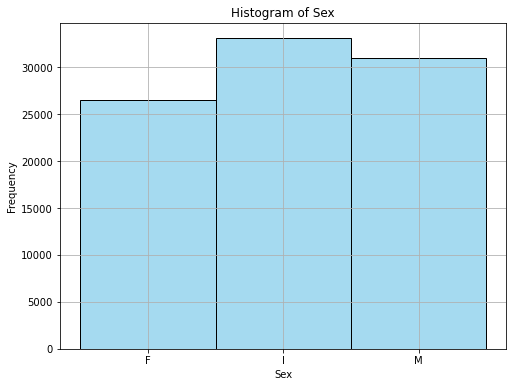

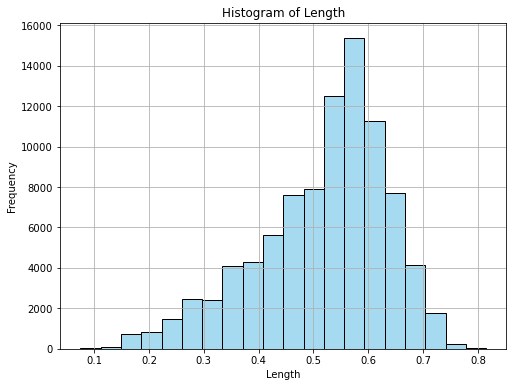

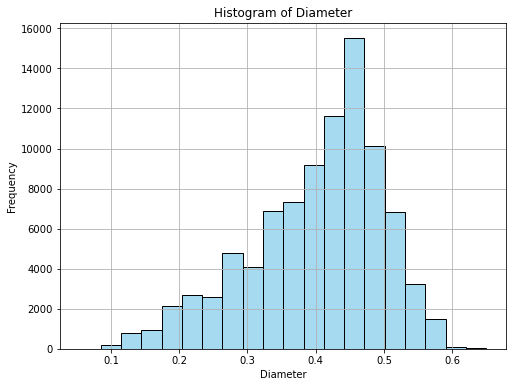

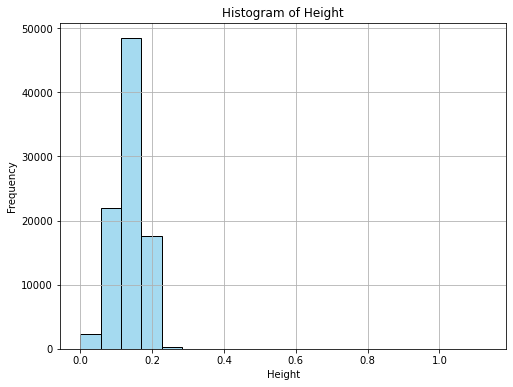

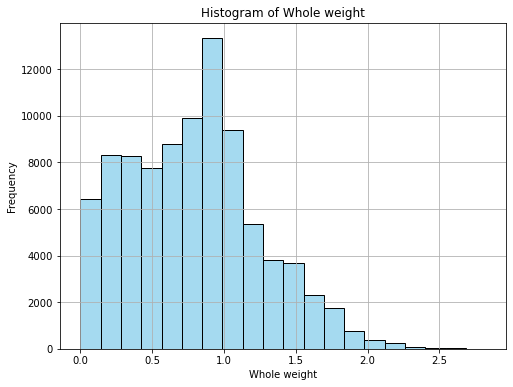

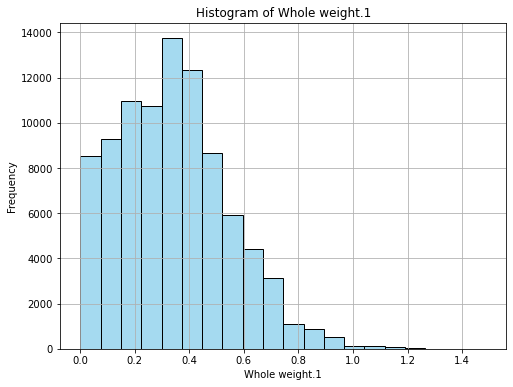

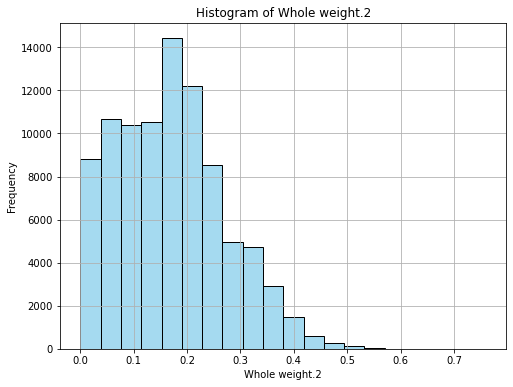

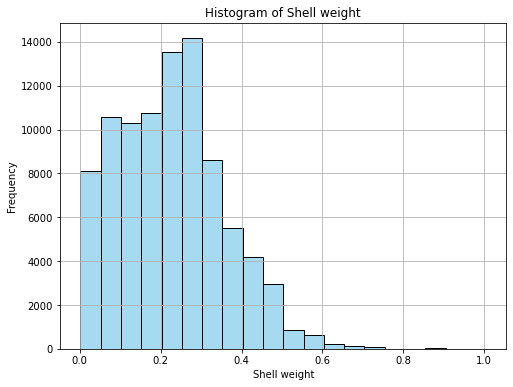

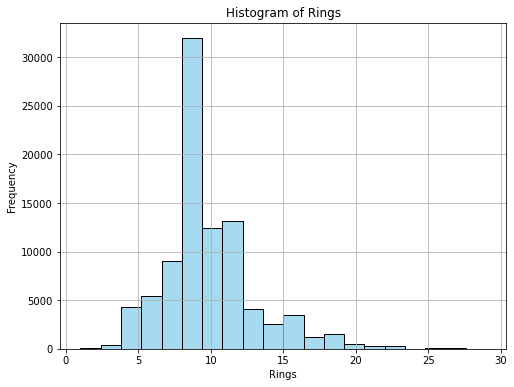

In [10]:

#Using Seaborn for plotting histograms for each numerical column
for column in  Abalone_df.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=Abalone_df, x=column, bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()
    

# BOXPLOT

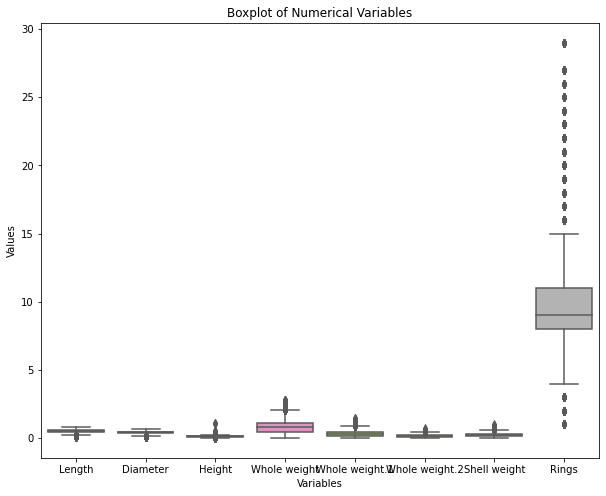

In [11]:
# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

sns.boxplot(data=Abalone_df, orient='v', palette='Set2')
plt.title('Boxplot of Numerical Variables')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.show()

# SCATTERPLOT

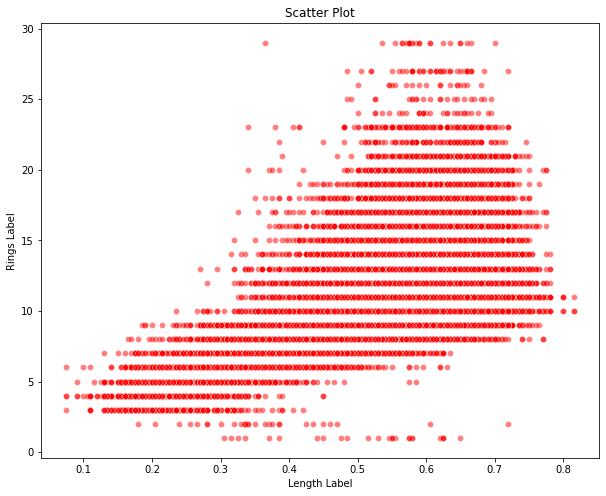

In [12]:
#Set up the figure and axis
plt.figure(figsize=(10, 8))
sns.scatterplot(data=Abalone_df, x='Length', y='Rings', color='red', alpha=0.5)  # Adjust 'x_column' and 'y_column' accordingly
plt.title('Scatter Plot')
plt.xlabel('Length Label')
plt.ylabel('Rings Label')
plt.show()

# HEATMAP

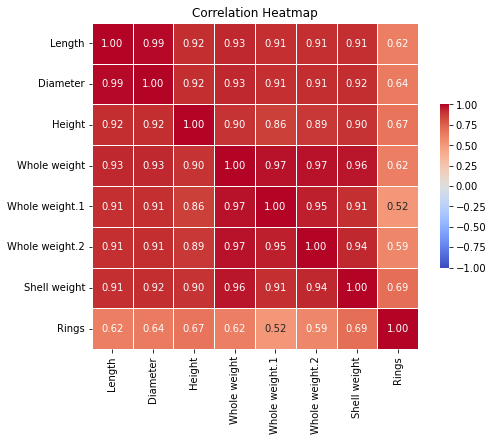

In [13]:
# Calculate the correlation matrix
corr_matrix = Abalone_df.corr()
plt.figure(figsize=(8, 6))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Heatmap')
plt.show()

# CREATING DUMMIES

In [14]:
#Creating dummies for the categorical variable 'SEX' and printing first 10 rows
Abalone_df = pd.get_dummies(Abalone_df, columns=['Sex'], drop_first=True)

print(Abalone_df.head(10))

   Length  Diameter  Height  Whole weight  Whole weight.1  Whole weight.2  \
0   0.550     0.430   0.150        0.7715          0.3285          0.1465   
1   0.630     0.490   0.145        1.1300          0.4580          0.2765   
2   0.160     0.110   0.025        0.0210          0.0055          0.0030   
3   0.595     0.475   0.150        0.9145          0.3755          0.2055   
4   0.555     0.425   0.130        0.7820          0.3695          0.1600   
5   0.610     0.480   0.170        1.2010          0.5335          0.3135   
6   0.415     0.325   0.110        0.3315          0.1655          0.0715   
7   0.610     0.490   0.150        1.1165          0.4955          0.2945   
8   0.205     0.150   0.040        0.0460          0.0145          0.0105   
9   0.565     0.425   0.125        0.6510          0.3795          0.1420   

   Shell weight  Rings  Sex_I  Sex_M  
0        0.2400     11      0      0  
1        0.3200     11      0      0  
2        0.0050      6      1      

In [15]:
new_df = Abalone_df.copy()

In [16]:
new_df.columns

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1',
       'Whole weight.2', 'Shell weight', 'Rings', 'Sex_I', 'Sex_M'],
      dtype='object')

# DATA PARTITION

In [17]:
# Identify predictors and outcomes
predictors = ['Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1',
       'Whole weight.2', 'Shell weight', 'Sex_I', 'Sex_M']
outcome = 'Rings'

#Data partitioning
# Train dataset split is 65% and Test dataset split is 35%
X = new_df[predictors]
y = new_df[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.35, random_state=1)


# MODELLING TECHNIQUES

# CATBOOST 

In [18]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error

# Define RMSLE function
def rmsle(y_true, y_pred):
    log_error = np.log1p(y_pred) - np.log1p(y_true)
    squared_log_error = np.square(log_error)
    mean_squared_log_error = np.mean(squared_log_error)
    rmsle = np.sqrt(mean_squared_log_error)
    return rmsle

# Define the CatBoostRegressor model
catboost_model = CatBoostRegressor(iterations=1767,  # Boosting iterations
                                   depth=7,          # Each tree depth
                                   max_bin = 571,
                                   min_data_in_leaf =69,
                                   subsample = 0.8,
                                   
                                   
                                   learning_rate=0.08555655321,  # Learning rate (shrinkage)
                                   random_state=361,   # Random state for reproducibility
                                   random_strength= 7.87946170923,
                                   loss_function='RMSE',  # Loss function
                                   l2_leaf_reg=7.7,          # L2 regularization coefficient
                                   bagging_temperature=0.08897,  # Controls the intensity of Bayesian bagging
                                   rsm=0.7,               # Random subspace method ratio
                                   verbose=1)       # Whether to print training progress (0: no printing, 1: printing)

# Train the CatBoost model
catboost_model.fit(train_X, train_y, early_stopping_rounds=55, verbose=False)

# Make predictions on the validation set
y_pred_val_catboost = catboost_model.predict(valid_X)

# Calculate RMSLE for tuned model
rmsle_val_catboost = rmsle(valid_y, y_pred_val_catboost)

print("Validation Set RMSLE (Tuned):", rmsle_val_catboost)

Validation Set RMSLE (Tuned): 0.14797747942111564


# TESTING

##### TESTING THE MODEL USING test.csv

In [19]:
import pandas as pd

# Load the test data
Abalone_df_test = pd.read_csv("test.csv")
# Convert categorical columns to 'category' dtype
Abalone_df_test['Sex'] = Abalone_df_test['Sex'].astype('category')


In [20]:
Abalone_df_test_dummies = pd.get_dummies(Abalone_df_test, columns=['Sex'], drop_first=True)


In [21]:
Abalone_df_test_dummies = Abalone_df_test_dummies.drop(columns="id")
Abalone_df_test_dummies

,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Sex_I,Sex_M
0,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005,0,1
1,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750,0,1
2,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405,0,1
3,0.570,0.490,0.145,0.8740,0.3525,0.1865,0.2350,0,1
4,0.415,0.325,0.110,0.3580,0.1575,0.0670,0.1050,1,0
...,...,...,...,...,...,...,...,...,...
60406,0.345,0.260,0.085,0.1775,0.0735,0.0265,0.0500,1,0
60407,0.525,0.410,0.145,0.8445,0.3885,0.1670,0.2050,0,0
60408,0.590,0.440,0.155,1.1220,0.3930,0.2000,0.2650,1,0
60409,0.660,0.525,0.190,1.4935,0.5885,0.3575,0.4350,0,0


##### PREDICTIONS

In [22]:
predictions = catboost_model.predict(Abalone_df_test_dummies)

In [23]:
predictions

array([ 9.78054318,  9.68340159,  9.96220332, ..., 12.91200482,
       14.12767149,  8.48557428])

In [24]:
#Create a DataFrame for the predictions
predictions_df = pd.DataFrame({'id': Abalone_df_test['id'], 'Rings': predictions})

In [25]:
predictions_df

,id,Rings
0,90615,9.780543
1,90616,9.683402
2,90617,9.962203
3,90618,10.616463
4,90619,7.586419
...,...,...
60406,151021,6.408138
60407,151022,9.726992
60408,151023,12.912005
60409,151024,14.127671


#### SUBMISSION FILE

In [26]:
predictions_df.to_csv('Comp2_is6496.csv', index=False)